## Finding and Plotting Libor Rates and Correlation
---
## Objectiive

Do a basic data analysis on the [Libor]https://www.global-rates.com/en/interest-rates/libor/ rates data. 

### Import Python modules

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import linear_model 

### Reading Data

Load the swap and libor rates data.

In [2]:
# load data using pandas
df = pd.read_csv('swapLiborData.csv')

In [3]:
df.head()

,Date,US0001M,US0002M,US0003M,US0006M,US0012M,USSW2,USSW3,USSW5,USSW7,USSW10,USSW15,USSW30
0,41641,0.1683,0.21250,0.24285,0.3464,0.5826,0.4903,0.8705,1.7740,2.4540,3.0610,3.5613,3.8950
1,41642,0.1647,0.20995,0.23985,0.3452,0.5846,0.5113,0.9000,1.7920,2.4648,3.0665,3.5635,3.8953
2,41645,0.1625,0.20825,0.23935,0.3445,0.5854,0.5000,0.8760,1.7468,2.4203,3.0260,3.5315,3.8738
3,41646,0.1615,0.20820,0.24210,0.3447,0.5866,0.4985,0.8735,1.7375,2.4065,3.0098,3.5145,3.8580
4,41647,0.1610,0.20750,0.24040,0.3452,0.5856,0.5350,0.9520,1.8280,2.4835,3.0650,3.5500,3.8703


The 'Date' variable in the original file is in numeric format. We transform it into a more readable year-month-day format.

In [4]:
df['Date'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(df['Date'],'D')
df.head()

,Date,US0001M,US0002M,US0003M,US0006M,US0012M,USSW2,USSW3,USSW5,USSW7,USSW10,USSW15,USSW30
0,2014-01-02,0.1683,0.21250,0.24285,0.3464,0.5826,0.4903,0.8705,1.7740,2.4540,3.0610,3.5613,3.8950
1,2014-01-03,0.1647,0.20995,0.23985,0.3452,0.5846,0.5113,0.9000,1.7920,2.4648,3.0665,3.5635,3.8953
2,2014-01-06,0.1625,0.20825,0.23935,0.3445,0.5854,0.5000,0.8760,1.7468,2.4203,3.0260,3.5315,3.8738
3,2014-01-07,0.1615,0.20820,0.24210,0.3447,0.5866,0.4985,0.8735,1.7375,2.4065,3.0098,3.5145,3.8580
4,2014-01-08,0.1610,0.20750,0.24040,0.3452,0.5856,0.5350,0.9520,1.8280,2.4835,3.0650,3.5500,3.8703


### Find Libor Rates and Plot Curves


Write a function that given the dataframe and a date such as '2014-01-08' returns a vector of length 5 
with the libor rates for that date (1, 2, 3, 6, and 12 months). You can assume that the date given can always be found in the data.

In [5]:
def libor_rates_date(df, date):
    ''' Retrieve the Libor rates (all terms) for a given date. '''
    
    libor_rates = np.zeros(5)
    
    temp = df[df['Date'] == date].iloc[0,1:6]
    libor_rates = np.array(temp, dtype='float')
    
    return libor_rates


In [6]:
dates = ['2014-01-08', '2014-03-13', '2015-01-17', '2016-10-03', '2018-07-20']

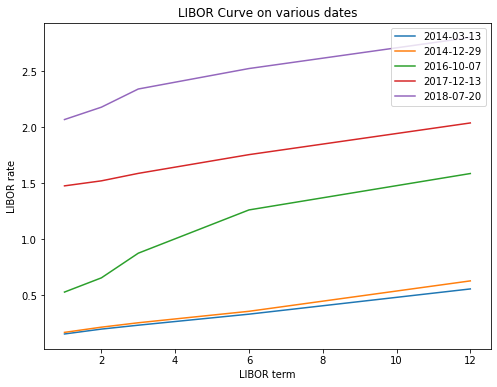

In [7]:
plt.figure(figsize=(8,6)) 

for d in dates:
    plt.plot([1, 2, 3, 6 ,12], libor_rates_date(df, d)) # plot rates

# labels, title and legends
plt.xlabel('LIBOR term')
plt.ylabel('LIBOR rate')
plt.title('LIBOR Curve on various dates')
plt.legend(dates)

plt.show()

Now, write another function that returns the Libor rate for a specific date and term (in months). 
The term can be any of the following integers: 1, 2, 3, 6, 12. 
Hint: you can use the previous function 'libor_rates_date' as part of your code.

In [8]:
def libor_rate_date_term(df, date, term):
    ''' Retrieve the Libor rate for a given date and term. '''
    
    libor = 0.
    
    libors = libor_rates_date(df, date)
    if term == 1:
        libor = libors[0]
    elif term == 2:
        libor = libors[1]
    elif term == 3:
        libor = libors[2]
    elif term == 6:
        libor = libors[3]
    elif term == 12:
        libor = libors[4]
   
    return libor

Use the previous function to find swap rates (rounded to **4** decimals)

In [9]:
# question 1
date = '2015-03-31'
term = 2
libor_rate = libor_rate_date_term(df, date, term)
print(np.round(libor_rate,4))

0.2218


In [10]:
# question 2
date = '2017-12-12'
term = 6
libor_rate = libor_rate_date_term(df, date, term)
print(np.round(libor_rate,4))

1.7477


In [11]:
# question 3
date = '2018-05-25'
term = 12
libor_rate = libor_rate_date_term(df, date, term)
print(np.round(libor_rate,4))

2.7314


### Computing Libor rates correlations

Compute the correlation between different Libor rates over certain time windows. For this analysis, write a function that given two dates d1 <= d2, returns a dataframe with all the libor rates in that time interval.

In [12]:
def libor_rates_time_window(df, d1, d2):
    ''' Retrieve the Libor rates (all terms) for the date window d1 to d2. '''
    
    sub_df = pd.DataFrame()

    sub_df = df[df['Date'] >= d1]
    sub_df = sub_df[sub_df['Date'] <= d2]
    sub_df = sub_df.iloc[:,:6]
    
    return sub_df

### Scatter Plots

In [13]:
def scatter_plot_window(df, d1, d2):
    ''' Plots scatter plots for a time window. '''
    
    df_sub = libor_rates_time_window(df, d1, d2)
    
    plt.figure(figsize=(10,10))
    
    plt.subplot(2,2,1)
    plt.title('Time window: ' + d1 + ' to ' + d2)
    plt.plot(df_sub.US0001M, df_sub.US0002M, '.')
    plt.xlabel('1M LIBOR rate')
    plt.ylabel('2M LIBOR rate')
    
    plt.subplot(2,2,2)
    plt.plot(df_sub.US0006M, df_sub.US0012M, '.')
    plt.xlabel('6M LIBOR rate')
    plt.ylabel('12M LIBOR rate')
    
    plt.subplot(2,2,3)
    plt.plot(df_sub.US0001M, df_sub.US0012M, '.')
    plt.xlabel('1M LIBOR rate')
    plt.ylabel('12M LIBOR rate')
    
    plt.subplot(2,2,4)
    plt.plot(df_sub.US0003M, df_sub.US0006M, '.')
    plt.xlabel('3M LIBOR rate')
    plt.ylabel('6M LIBOR rate')
    
    plt.show()
    

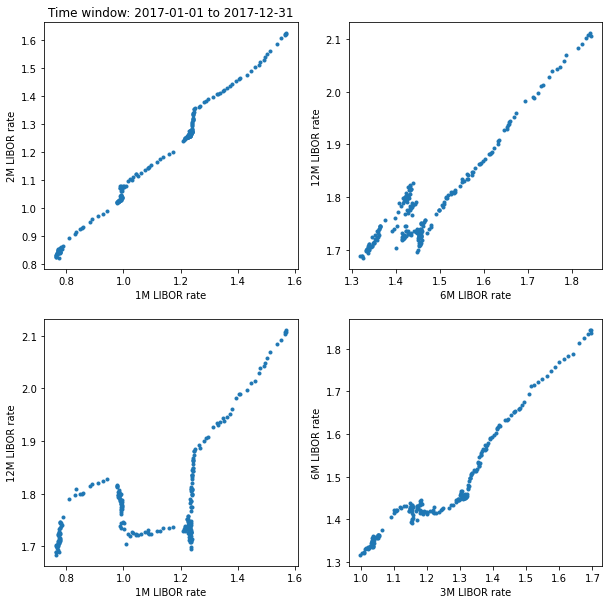

In [14]:
scatter_plot_window(df, '2017-01-01', '2017-12-31')

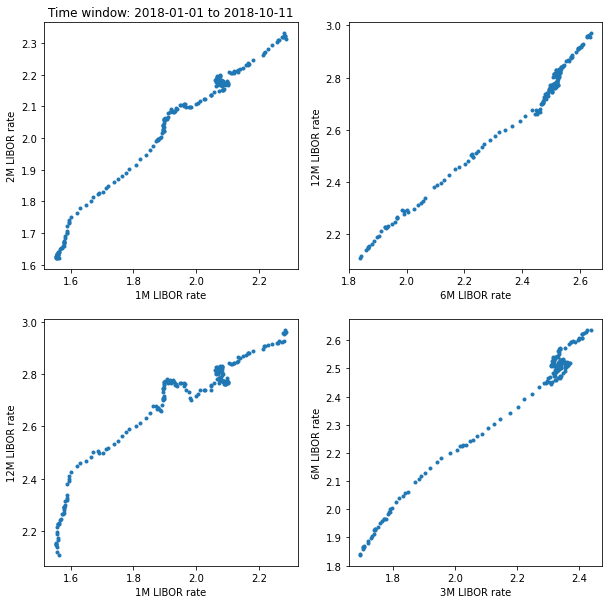

In [15]:
scatter_plot_window(df, '2018-01-01', '2018-10-11')

Write a function that given a time window [d1, d2] and two Libor terms (in months) t1 and t2 returns the correlation of the corresponding Libor rates during that window. 

In [16]:
def corr_window(df, d1, d2, term1, term2):
    
    corr = 0.0
    
    if term1 == term2:
        corr = 1.
        return corr
    
    def col_name(term):
        if term == 12:
            return 'US0012M'
        else:
            return 'US000' + str(term) + 'M'
        
    col_name_1 = col_name(term1)
    col_name_2 = col_name(term2)
    df_sub = libor_rates_time_window(df[['Date', col_name_1, col_name_2]], d1, d2)
    df_corr = df_sub.corr()
    corr = df_corr.iloc[0,1]
    
    return corr

In [17]:
date1 = '2014-01-01'
date2 = '2015-12-31'
libor_term1 = 1
libor_term2 = 3
corr = corr_window(df, date1, date2, libor_term1, libor_term2)
print(np.round(corr, 3))

0.972


In [18]:
date1 = '2016-01-01'
date2 = '2017-12-31'
libor_term1 = 1
libor_term2 = 12
corr = corr_window(df, date1, date2, libor_term1, libor_term2)
print(np.round(corr, 3))

0.864


In [19]:
date1 = '2018-01-01'
date2 = '2018-10-11'
libor_term1 = 2
libor_term2 = 6
corr = corr_window(df, date1, date2, libor_term1, libor_term2)
print(np.round(corr, 3))

0.967
